In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
import os, h5py

In [2]:
size_cut_mpc = "20 Mpc"

s = pynbody.load(".data/step_1_uniform/gadget_output/snapshot_047.hdf5")
s.physical_units()

print("avaiable types" , s.families())

avaiable types [<Family dm>]


/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:449: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [3]:
type(s)

pynbody.snapshot.gadgethdf.GadgetHDFSnap

In [8]:
s.dm.loadable_keys()

['pos', 'iord', 'vel', 'eps', 'mass']

In [9]:
str(s.dm["pos"].max())

'74272.14'

In [64]:
pynbody.analysis.halo.center(s)

/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


<Transformation translate, offset_velocity>

In [70]:
mask = pynbody.filt.Sphere(size_cut_mpc)
s_cut = s.dm[mask]

In [71]:
s_cut.loadable_keys()

['mass', 'pos', 'eps', 'iord', 'vel']

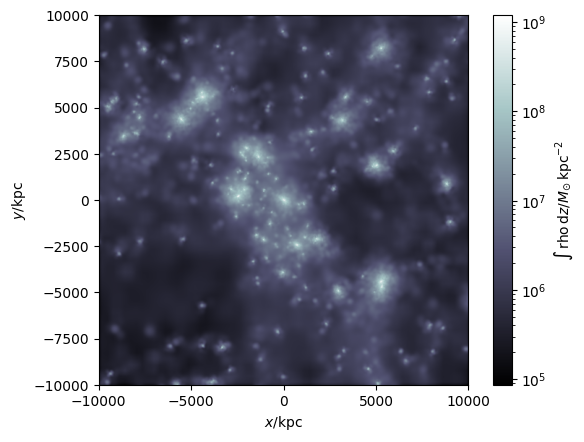

In [73]:
map_out = pynbody.plot.sph.image(
                                  s_cut
                                 , width= str(20)+" Mpc"
                                 , qty="rho"
                                 , av_z=None           
                                 , units="Msol kpc^-2"
                                 , resolution=512
                                 , cmap="bone",noplot=False
                                 )


plt.show()

In [18]:
mask

Sphere('7.00e+01 kpc', array([0, 0, 0]))

In [76]:
s_cut.loadable_keys()

['mass', 'pos', 'eps', 'iord', 'vel']

In [77]:
s_cut["x"]

SimArray([-4409.3936, -4400.3115, -4391.7285, ..., 13553.371 , 13670.865 ,
          15073.104 ], shape=(240014,), dtype=float32, 'kpc')

In [45]:
len(s_cut["vel"])

642248

In [81]:
for var in list(s_cut.loadable_keys()):
    if len(s_cut[var].shape) == 1:
        print(var, max(s_cut[var]), min(s_cut[var]))

mass 7759946000.0 7759946000.0
eps 14.854428 14.854428
iord 2094011 4774


/home/tmassagl/development/pynbody/.venv/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


In [48]:
qt = ["x","y","z","mass","rho"]
qt_units = [str(s_cut[x].units) for x in qt]

In [9]:
out_path = ".data/out/gas_illustris_342447_cut"

with h5py.File(f"{out_path}.hdf5", "w") as f:
    for qt, qt_unit in zip(qt, qt_units):
        xx = np.array(s_cut[qt].in_units(qt_unit))
        __ = f.create_dataset(qt, data = xx)

In [49]:
import pandas as pd

In [50]:
qt

['x', 'y', 'z', 'mass', 'rho']

In [51]:
df = pd.DataFrame([list(s_cut[x].in_units(y)) for x, y in zip(qt, qt_units)]).transpose()
df.columns = qt

In [52]:
df.dtypes

x       float64
y       float64
z       float64
mass    float64
rho     float64
dtype: object

In [56]:
df.to_feather(".data/out/gas_illustris_342447_cut.lz4")

In [10]:
df.to_csv(".data/out/gas_illustris_342447_cut.csv")

In [28]:
with open(f"{out_path}.ascii", "w") as f:
    f.write(df.to_string(index=False))

In [29]:
# Read the ascii output test

f = pynbody.snapshot.ascii.AsciiSnap(".data/out/gas_illustris_342447_cut.ascii")

In [30]:
f.physical_units()

In [31]:
f["x"]

SimArray([-1.180393, -1.596977, -1.386956, ...,  0.545694, -0.349543,
           0.267881], shape=(642248,), 'kpc')

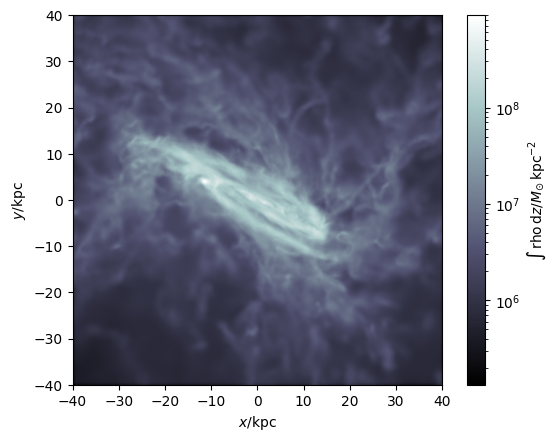

In [32]:
map_out = pynbody.plot.sph.image(
                                f,
                                width= str(80)+" kpc",
                                qty="rho",
                                av_z=None, 
                                units="Msol kpc^-2",
                                resolution=512,
                                cmap="bone",noplot=False,
                                )

plt.show()